In [5]:
from sklearn.decomposition import FastICA
import cv2
from pylab import *
from skimage import data, io, color
import os
import glob
import time

total_time = 0.0
sum_fit = 0.0
sum_fit_transform = 0.0
start_total = time.process_time()
i=0
os.mkdir('ica-output-60-comps')
path="resized-output/*.jpeg*"

for image in glob.glob(path):
    X=io.imread(image,as_gray=True)
    ica = FastICA(n_components = 60)
    
    start_fit = time.process_time()
    ica.fit(X)
    sum_fit += time.process_time() - start_fit
    
    # reconstruct image with independent components
    start_fit_transform = time.process_time()
    emc2_image_ica = ica.fit_transform(X)
    sum_fit_transform += time.process_time() - start_fit_transform
    
    emc2_restored = ica.inverse_transform(emc2_image_ica)
    emc2_restored = emc2_restored.astype(np.uint8) 
    # show image to screen
#     io.imshow(emc2_restored)
#     show()

    io.imsave("ica-output-60-comps/image%05i.jpeg" %i, emc2_restored)
    i += 1
    
total_time += time.process_time() - start_total

avg_fit = sum_fit/1000
avg_fit_transform = sum_fit_transform/1000

print("Total Fit Time: ", sum_fit)
print("Average Fit time: ", avg_fit)
print("Total Fit-Transform Time: ", sum_fit_transform)
print("Average Fit-Transform time: ", avg_fit_transform)
print("Total Time required for execution: ", total_time)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing

Total Fit Time:  1509.953125
Average Fit time:  1.509953125
Total Fit-Transform Time:  1525.46875
Average Fit-Transform time:  1.52546875
Total Time required for execution:  3061.984375


In [8]:
import xlsxwriter
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [10]:
workbook = xlsxwriter.Workbook('ICA-Dimensionality-reduction-analysis.xlsx')
worksheet = workbook.add_worksheet()

worksheet.write('A1', 'log(MSE-ICA-40-components)')
worksheet.write('B1', 'log(MSE-ICA-45-components)')
worksheet.write('C1', 'log(MSE-ICA-50-components)')
worksheet.write('D1', 'log(MSE-ICA-55-components)')
worksheet.write('E1', 'log(MSE-ICA-60-components)')

path_resized = "D:/Documents/final-year-project/resized-output/*.jpeg*"
path_ica_40_comps = "D:/Documents/final-year-project/ica-output-40-comps/*.jpeg*"
path_ica_45_comps = "D:/Documents/final-year-project/ica-output-45-comps/*.jpeg*"
path_ica_50_comps = "D:/Documents/final-year-project/ica-output-50-comps/*.jpeg*"
path_ica_55_comps = "D:/Documents/final-year-project/ica-output-55-comps/*.jpeg*"
path_ica_60_comps = "D:/Documents/final-year-project/ica-output-60-comps/*.jpeg*"

rowIndexICA = 2
for imgResized, imgICA40Comps, imgICA45Comps, imgICA50Comps, imgICA55Comps, imgICA60Comps in zip(glob.glob(path_resized), glob.glob(path_ica_40_comps), glob.glob(path_ica_45_comps), glob.glob(path_ica_50_comps), glob.glob(path_ica_55_comps), glob.glob(path_ica_60_comps)):
    img_resized = io.imread(imgResized)
    img_ica_40_comps = io.imread(imgICA40Comps)
    img_ica_45_comps = io.imread(imgICA45Comps)
    img_ica_50_comps = io.imread(imgICA50Comps)
    img_ica_55_comps = io.imread(imgICA55Comps)
    img_ica_60_comps = io.imread(imgICA60Comps)
    
    err_ica_40_comps = mse(img_resized, img_ica_40_comps)
    err_ica_45_comps = mse(img_resized, img_ica_45_comps)
    err_ica_50_comps = mse(img_resized, img_ica_50_comps)
    err_ica_55_comps = mse(img_resized, img_ica_55_comps)
    err_ica_60_comps = mse(img_resized, img_ica_60_comps)
    
    # Calculating log for better visualization
    log_mse_ica_40_comps = math.log(err_ica_40_comps)
    log_mse_ica_45_comps = math.log(err_ica_45_comps)
    log_mse_ica_50_comps = math.log(err_ica_50_comps)
    log_mse_ica_55_comps = math.log(err_ica_55_comps)
    log_mse_ica_60_comps = math.log(err_ica_60_comps)
    
    worksheet.write('A' + str(rowIndexICA), log_mse_ica_40_comps)
    worksheet.write('B' + str(rowIndexICA), log_mse_ica_45_comps)
    worksheet.write('C' + str(rowIndexICA), log_mse_ica_50_comps)
    worksheet.write('D' + str(rowIndexICA), log_mse_ica_55_comps)
    worksheet.write('E' + str(rowIndexICA), log_mse_ica_60_comps)
   
    rowIndexICA += 1
    
workbook.close()

print("ICA MSE Calculation Successful!")

ICA MSE Calculation Successful!


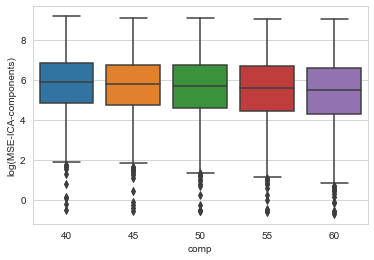

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
Boxplot= pd.read_csv("D:/Documents/final-year-project/ANALYSIS OF DR/ica-mse-analysis.csv")

sns.set_style("whitegrid")

boxplot_ica = sns.boxplot(x = 'comp', y = 'log(MSE-ICA-components)', data = Boxplot)
plt.savefig('D:/Documents/final-year-project/ANALYSIS OF DR/ICA_DR_analysis_boxplot.png', orientation = 'horizontal')